<a href="https://colab.research.google.com/github/UN-things/IS-project/blob/main/IS_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nombre cool del proyecto :3

**Integrantes:**
- Valeria Huepa Ducuara
- Liseth Yurany Arevalo Yaruro
- Guiselle Tatiana Zambrano Penagos

## Comprensión del Negocio

[TripAdvisor](https://www.tripadvisor.co/) es un sitio web estadounidense que proporciona reseñas de contenido relacionado con viajes, es gratuita y se financia con publicidad. Esta empresa busca encontrar un modo de mantener o incrementar el flujo de usuarios que la visitan (huéspedes y propietarios), pues es con este volúmen con el que cuenta para recaudar dinero de la publicidad que expone en su sitio web.

Una solución propuesta es emplear las reseñas que los huéspedes dejan y ofrecer un análisis de sentimiento general, donde se puedan evidenciar cuales son los factores que más llaman la atención de los usuarios y cuales son los determinantes de una mala o buena experiencia. Así los propietarios de hoteles que usen el sitio mejorarán su servicio y los huéspedes estararán satifechos con el servicio de los hoteles y las ofertas que ofrezaca la página web, manteniendo e incrementando la cantidad de usuarios que la usen.

### Librerías requeridas

In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [2]:
%%capture
color = sns.color_palette()
py.init_notebook_mode(connected=True)
nltk.download('vader_lexicon')

In [5]:
! mkdir -p data
! cd data && wget -nc https://raw.githubusercontent.com/UN-things/IS-project/main/data/tripadvisor_hotel_reviews.csv

--2021-07-23 10:08:29--  https://raw.githubusercontent.com/UN-things/IS-project/main/data/tripadvisor_hotel_reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14966021 (14M) [text/plain]
Saving to: ‘tripadvisor_hotel_reviews.csv’

tripadvisor_hotel_r 100%[===================>]  14.27M  --.-KB/s    in 0.1s    

2021-07-23 10:08:29 (128 MB/s) - ‘tripadvisor_hotel_reviews.csv’ saved [14966021/14966021]



In [7]:
df = pd.read_csv('data/tripadvisor_hotel_reviews.csv', sep=',')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


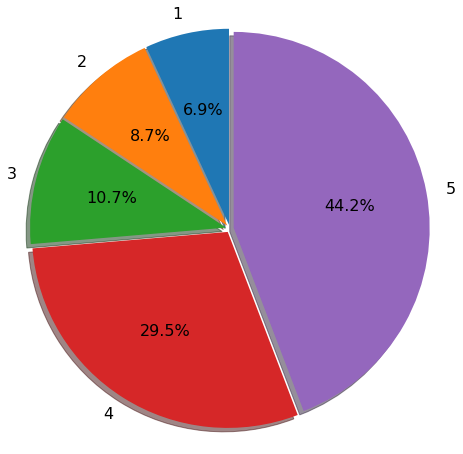

In [12]:
temp = df.groupby('Rating').size().reset_index(name="count")
temp['Percentage'] = round(100 * temp['count']  / temp['count'].sum(), 2)

plt.rcParams['font.size'] = 16.0

labels = temp['Rating']
sizes = temp['Percentage']
explode = (0.02, 0.02, 0.02, 0.02, 0.02)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [13]:
sid = SentimentIntensityAnalyzer()
df['scores'] = df['Review'].apply(lambda hotel_overview: sid.polarity_scores(str(hotel_overview)))
df.head()

,Review,Rating,scores
0,nice hotel expensive parking got good deal sta...,4,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co..."
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com..."
2,nice rooms not 4* experience hotel monaco seat...,3,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp..."
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com..."
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co..."


In [14]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment']=''
df.loc[df.compound>0,'sentiment']='POSITIVE'
df.loc[df.compound==0,'sentiment']='NEUTRAL'
df.loc[df.compound<0,'sentiment']='NEGATIVE'
df.head()

,Review,Rating,scores,compound,sentiment
0,nice hotel expensive parking got good deal sta...,4,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co...",0.9747,POSITIVE
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787,POSITIVE
2,nice rooms not 4* experience hotel monaco seat...,3,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...",0.9889,POSITIVE
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912,POSITIVE
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797,POSITIVE


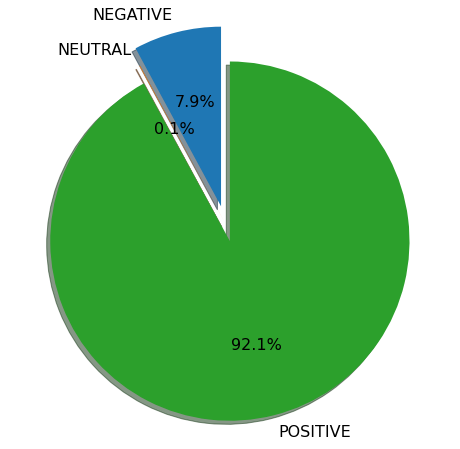

In [15]:
temp_2 = df.groupby('sentiment').size().reset_index(name="count")
temp_2['Percentage'] = round(100 * temp_2['count']  / temp_2['count'].sum(), 2)

labels = temp_2['sentiment']
sizes = temp_2['Percentage']
explode = (0.1, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.rcParams['font.size'] = 16.0

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()